# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [1]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

# Etapa 2: Carregamento da base de dados

In [2]:
base_dados = pd.read_csv('./inputs/base_treinamento.txt', encoding = 'utf-8')

In [3]:
base_dados.shape

(196, 2)

In [4]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [5]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


/home/patrick/anaconda3/envs/fatec/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


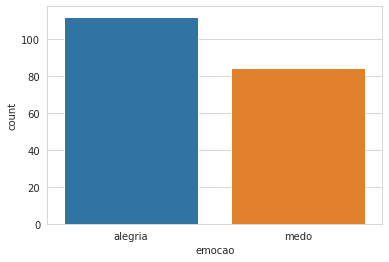

In [6]:
sns.countplot(base_dados['emocao'], label = 'Contagem');

# Etapa 3: Função para pré-processamento dos textos

In [7]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [9]:
print(stop_words)

{'uns', 'suas', 'foram', 'ter', 'aquelas', 'sabe', 'ser', 'estão', 'parte', 'és', 'algumas', 'qualquer', 'quinze', 'falta', 'certeza', 'porque', 'disso', 'quais', 'isso', 'nosso', 'dez', 'quanto', 'estás', 'esses', 'tivestes', 'ela', 'têm', 'teu', 'nossos', 'tentei', 'tendes', 'dezasseis', 'sistema', 'põem', 'tentaram', 'em', 'forma', 'onde', 'nas', 'conselho', 'teve', 'estar', 'podem', 'você', 'pelas', 'eventual', 'des', 'comprida', 'sétimo', 'esse', 'doze', 'estivestes', 'pode', 'teus', 'aquele', 'um', 'irá', 'dar', 'tua', 'vos', 'neste', 'vocês', 'só', 'dezanove', 'contudo', 'põe', 'daquela', 'entre', 'sou', 'nessa', 'devem', 'logo', 'números', 'pela', 'zero', 'às', 'conhecido', 'faz', 'grandes', 'sobre', 'parece', 'fez', 'for', 'mesmo', 'geral', 'nossas', 'podia', 'que', 'ambos', 'possivelmente', 'estava', 'tiveste', 'nenhuma', 'não', 'quinto', 'estará', 'naquela', 'maiorias', 'dizer', 'lhe', 'mas', 'nós', 'aquela', 'meses', 'quatro', 'bastante', 'por', 'pôde', 'nada', 'porém', 'se

In [10]:
len(stop_words)

413

In [11]:
pln = spacy.load('pt')

In [12]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)
  lista = [token.lemma_ for token in documento if token.lemma_ not in stop_words and token.lemma_ not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  return lista

In [13]:
teste = preprocessamento('Estou aPrendendo 1 10 23 processamento de linguagem natural, Curso em Curitiba')
teste

'aprender processamento linguagem natural cursar curitiba'

# Etapa 4: Pré-processamento da base de dados

### Limpeza dos textos

In [14]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [15]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [16]:
base_dados.head(10)

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
5,adorar cabelar maciar,alegria
6,adorar o cor olho,alegria
7,somar amável o outro,alegria
8,sentir umar afeição,alegria
9,querer agradar filho,alegria


### Tratamento da classe

In [17]:
base_dados_final = []
for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):#função zip para trabalhar os dois paramêtros
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

In [18]:
len(base_dados_final)

196

In [19]:
base_dados_final

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

# Etapa 5: Criação do classificador

In [20]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("ALEGRIA")
categorias.add_label("MEDO")
modelo.add_pipe(categorias)
historico = []

In [21]:
modelo.begin_training()
for epoca in range(100):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 0.0061274521285668015}


In [22]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [23]:
historico_loss = np.array(historico_loss)
historico_loss

array([0.00612745])

Text(0, 0.5, 'Erro')

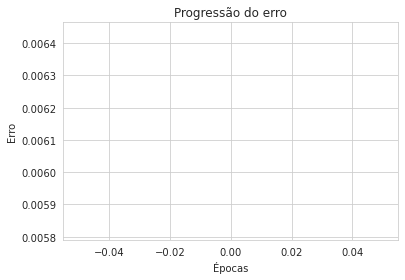

In [24]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')

In [25]:
modelo.to_disk("modelo")

# Etapa 6: Testes com uma frase

In [26]:
modelo_carregado = spacy.load("modelo")
modelo_carregado

In [27]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [28]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'adorar cor olho'

In [29]:
previsao = modelo_carregado(texto_positivo)
previsao

adorar cor olho

In [30]:
previsao.cats

{'ALEGRIA': 0.9853804707527161, 'MEDO': 0.0007854810100980103}

In [31]:
texto_negativo = 'estou com medo dele'
previsao = modelo_carregado(preprocessamento(texto_negativo))
previsao.cats

{'ALEGRIA': 0.005403746850788593, 'MEDO': 0.9999024868011475}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento


In [32]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [33]:
previsoes

[{'ALEGRIA': 0.9982590079307556, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9971711039543152, 'MEDO': 7.446911331498995e-05},
 {'ALEGRIA': 0.998738706111908, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9969171285629272, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9977778792381287, 'MEDO': 9.881774167297408e-05},
 {'ALEGRIA': 0.9968516230583191, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9976945519447327, 'MEDO': 0.00014744764484930784},
 {'ALEGRIA': 0.9989960789680481, 'MEDO': 6.31002985755913e-05},
 {'ALEGRIA': 0.9931625127792358, 'MEDO': 6.695770571241155e-05},
 {'ALEGRIA': 0.9974384307861328, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.99957674741745, 'MEDO': 4.539786823443137e-05},
 {'ALEGRIA': 0.9951812624931335, 'MEDO': 0.00014814511814620346},
 {'ALEGRIA': 0.9971932768821716, 'MEDO': 0.00022997264750301838},
 {'ALEGRIA': 0.9968271851539612, 'MEDO': 0.00010014657891588286},
 {'ALEGRIA': 0.9957414865493774, 'MEDO': 0.00017139823467005044},
 {'ALEGRIA': 0.996712207

In [34]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [35]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [36]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [38]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## Avaliação na base de teste

In [39]:
base_dados_teste = pd.read_csv('./inputs/base_teste.txt', encoding = 'utf-8')

In [40]:
base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [41]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)

In [42]:
base_dados_teste.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [43]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [44]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [45]:
respostas_reais = base_dados_teste['emocao'].values

In [46]:
accuracy_score(respostas_reais, previsoes_final)

0.5952380952380952

In [47]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[33, 15],
       [19, 17]])